In [126]:
import numpy as np
import matplotlib.pyplot as plt
import bemcs

# Linearly varying forces along line segments

In this example we show how to compute displacements and stresses resulting from body forces acting along an array of line segments

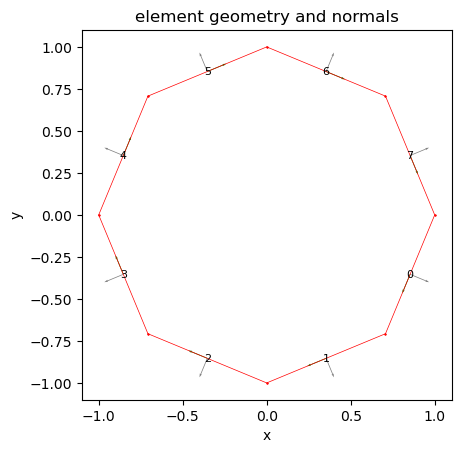

In [127]:
# Elastic parameter (shear modulus)
mu = 1.0
els = bemcs.initialize_els()

npts = 9
xvals = 1 * np.cos(np.linspace(0, 2 * np.pi, npts))
yvals = -1 * np.sin(np.linspace(0, 2 * np.pi, npts))
# setup a fault geometry
# els.x1 = np.array([-1.0, 0.0])
# els.y1 = np.array([-0.5, 0.0])
# els.x2 = np.array([0.0, 1.0])
# els.y2 = np.array([0.0, 0.0])
els.x1 = xvals[0:-1]
els.x2 = xvals[1:]
els.y1 = yvals[0:-1]
els.y2 = yvals[1:]

bemcs.standardize_els_geometry(els, reorder=False)
n_els = len(els.x1)
bemcs.plot_els_geometry(els)

# lincoefs = np.array([1.0, 0.0, 0.0, 1.0])
lincoefs = np.zeros(n_els * 2)
lincoefs[0::4] = 1
lincoefs[3::4] = 1

## Kernel calculation and compute $u,\sigma$

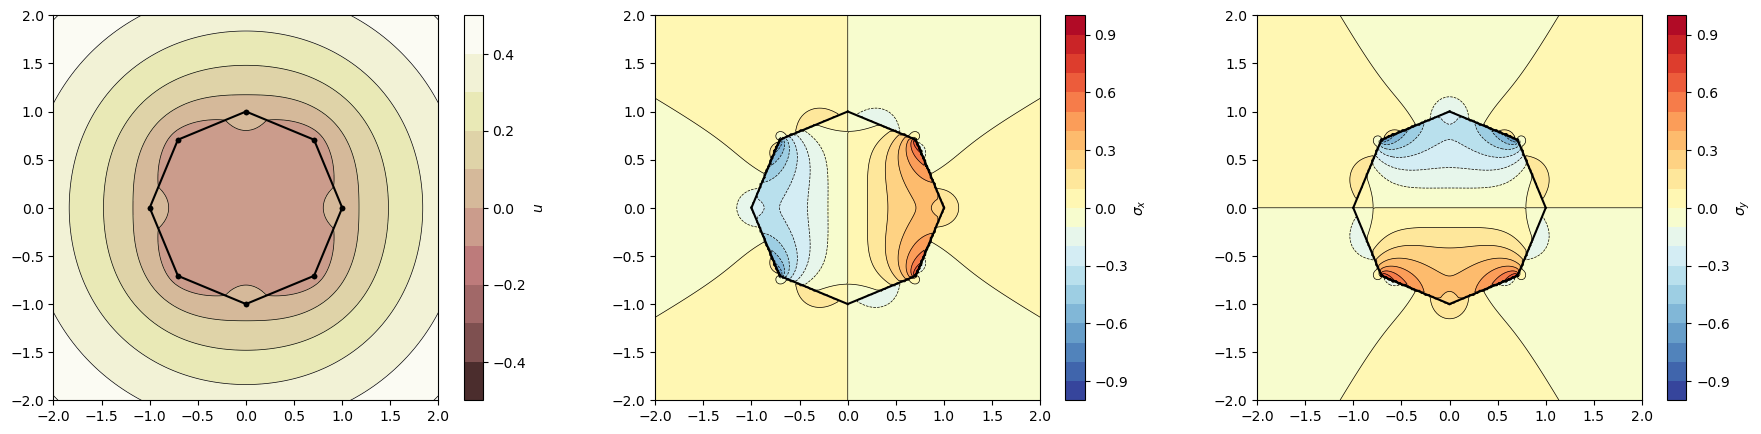

In [128]:
nx_obs = 200
ny_obs = 200
x_obs = np.linspace(-2, 2, nx_obs)
y_obs = np.linspace(-2, 2, ny_obs)
x_obs, y_obs = np.meshgrid(x_obs, y_obs)
xo = x_obs.flatten().reshape(-1, 1)
yo = y_obs.flatten().reshape(-1, 1)

K_sx, K_sy, K_u = bemcs.get_displacement_stress_kernel_force_antiplane(xo, yo, els, mu)

# compute displacements and stress components
u = K_u @ lincoefs
sx = K_sx @ lincoefs
sy = K_sy @ lincoefs

plt.figure(figsize=(22, 5))
plt.subplot(1, 3, 1)
toplot = u.reshape(ny_obs, nx_obs)
maxval = 0.5
minval = -maxval
levels = np.linspace(minval, maxval, 11)
plt.contourf(
    xo.reshape(ny_obs, nx_obs),
    yo.reshape(ny_obs, nx_obs),
    toplot,
    cmap="pink",
    vmin=minval,
    vmax=maxval,
    levels=levels,
)
for i in range(n_els):
    plt.plot([els.x1[i], els.x2[i]], [els.y1[i], els.y2[i]], "k.-")
plt.colorbar(label="$u$")
plt.contour(
    xo.reshape(ny_obs, nx_obs),
    yo.reshape(ny_obs, nx_obs),
    toplot,
    colors="k",
    levels=levels,
    linewidths=0.5,
)
plt.gca().set_aspect("equal", adjustable="box")

plt.subplot(1, 3, 2)
toplot = sx.reshape(ny_obs, nx_obs)
maxval = 1
minval = -maxval
levels = np.linspace(minval, maxval, 21)
plt.contourf(
    xo.reshape(ny_obs, nx_obs),
    yo.reshape(ny_obs, nx_obs),
    toplot,
    cmap="RdYlBu_r",
    vmin=minval,
    vmax=maxval,
    levels=levels,
)
for i in range(n_els):
    plt.plot([els.x1[i], els.x2[i]], [els.y1[i], els.y2[i]], "k-")
plt.colorbar(label="$\sigma_x$")
plt.contour(
    xo.reshape(ny_obs, nx_obs),
    yo.reshape(ny_obs, nx_obs),
    toplot,
    colors="k",
    levels=levels,
    linewidths=0.5,
)
plt.gca().set_aspect("equal", adjustable="box")

plt.subplot(1, 3, 3)
toplot = sy.reshape(ny_obs, nx_obs)
maxval = 1
minval = -maxval
levels = np.linspace(minval, maxval, 21)
plt.contourf(
    xo.reshape(ny_obs, nx_obs),
    yo.reshape(ny_obs, nx_obs),
    toplot,
    cmap="RdYlBu_r",
    vmin=minval,
    vmax=maxval,
    levels=levels,
)
plt.colorbar(label="$\sigma_y$")
plt.contour(
    xo.reshape(ny_obs, nx_obs),
    yo.reshape(ny_obs, nx_obs),
    toplot,
    colors="k",
    levels=levels,
    linewidths=0.5,
)
for i in range(n_els):
    plt.plot([els.x1[i], els.x2[i]], [els.y1[i], els.y2[i]], "k-")

plt.gca().set_aspect("equal", adjustable="box")
plt.show()

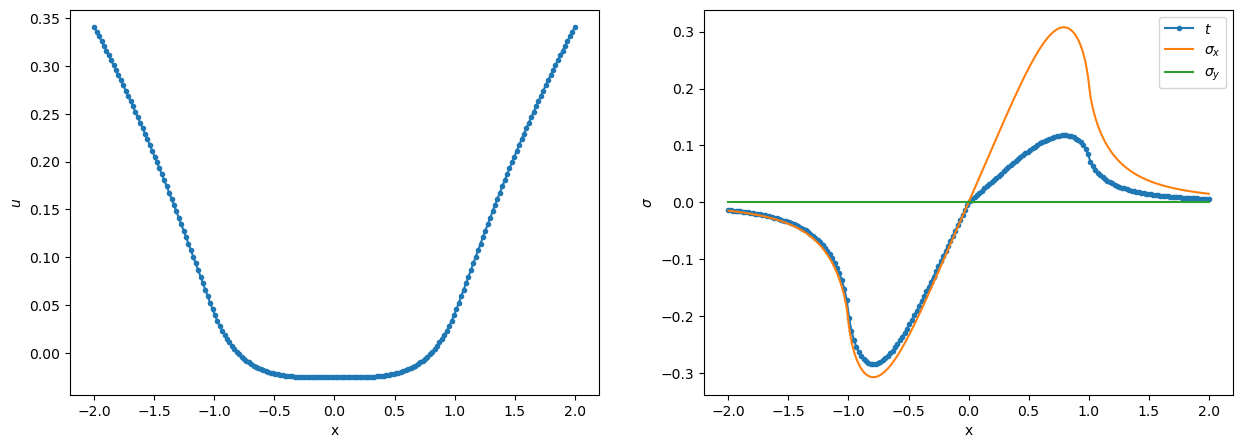

In [129]:
# Observation points
xo = np.linspace(-2, 2, 200).reshape(-1, 1)
yo = np.zeros_like(xo) + 0e-6

K_sx, K_sy, K_u = bemcs.get_displacement_stress_kernel_force_antiplane(xo, yo, els, mu)

els_plot = bemcs.initialize_els()
n_pts = 100
els_plot.x_normals = np.hstack(
    (els.x_normals[0] * np.ones(n_pts), els.x_normals[1] * np.ones(n_pts))
)
els_plot.y_normals = np.hstack(
    (els.y_normals[0] * np.ones(n_pts), els.y_normals[1] * np.ones(n_pts))
)
K_t = bemcs.get_traction_kernels_antiplane(els_plot, tuple([K_sx, K_sy]), nbasis=2)

# compute displacements and stress components
u = K_u @ lincoefs
sx = K_sx @ lincoefs
sy = K_sy @ lincoefs
t = K_t @ lincoefs

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(xo, u, ".-")
plt.xlabel("x")
plt.ylabel("$u$")

plt.subplot(1, 2, 2)
plt.plot(xo, t, ".-", label="$t$")
plt.plot(xo, sx, label="$\sigma_x$")
plt.plot(xo, sy, label="$\sigma_y$")

plt.legend()
plt.xlabel("x")
plt.ylabel("$\sigma$")

plt.show()